# Simple Evolutionary Exploration  Walkthrough

This notebook contains instructions on how to use the SEE module, along with several examples. These instructions will cover the following parts: 
* [Import Image Files](#Import_Image_Files)
* [Manual Search](#Manual_Search)
* [Genetic Algorithm Search](#Genetic_Algorithm_Search)
* [Reading the Results](#Reading_the_Results)

----
<a name="Import_Image_Files"></a>

## Import Image Files

First import the following packages:

In [1]:

%matplotlib inline
import matplotlib.pylab as plt
import imageio
from see import Segmentors
from see import JupyterGUI

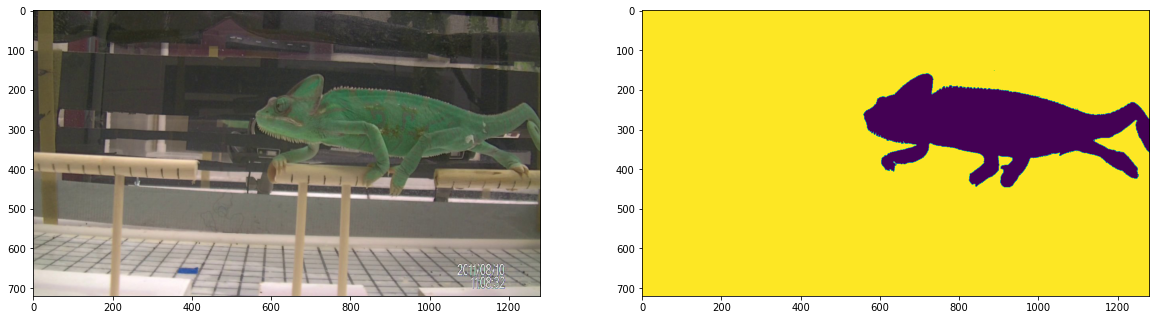

In [2]:
import imageio

img = imageio.imread('Image_data/Examples/AA_Chameleon.jpg')
gmask = imageio.imread('Image_data/Examples/AA_Chameleon_GT.png')

fig = plt.figure(figsize=(20, 20))
my_ax = fig.add_subplot(1, 2, 1)
my_ax.imshow(img)
my_ax = fig.add_subplot(1, 2, 2)
my_ax.imshow(gmask)



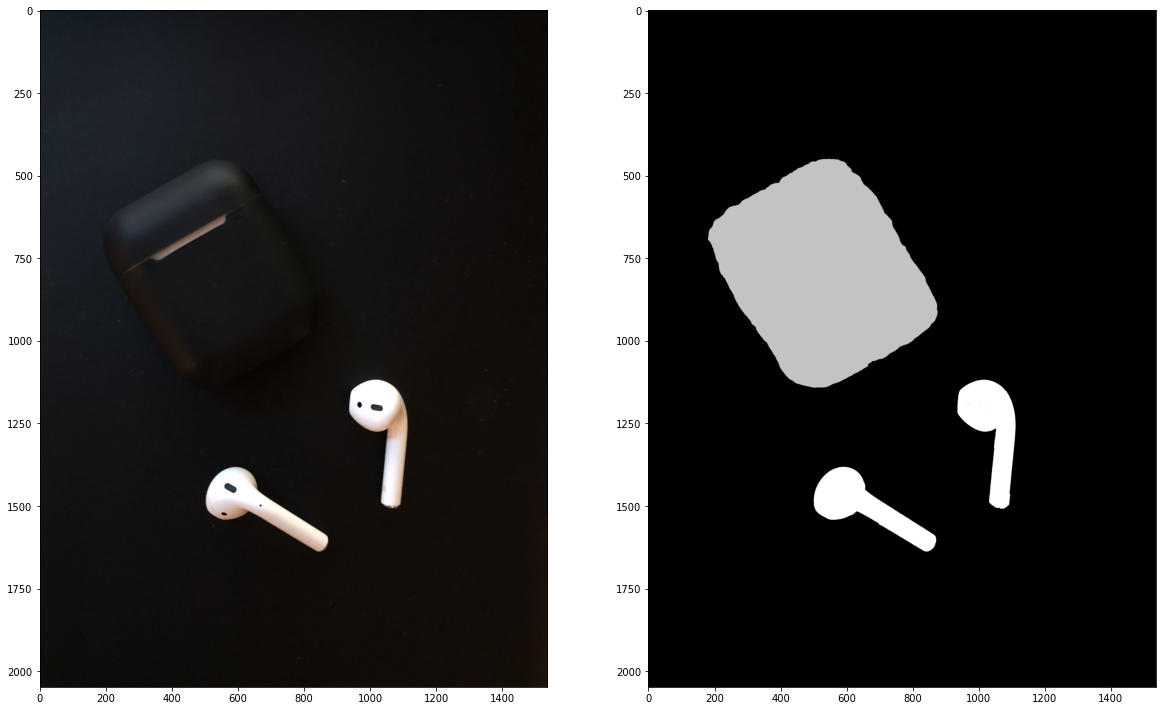

In [3]:
import imageio

img2 = imageio.imread('Image_data/Examples/Airpods.JPEG')
gmask2 = imageio.imread('Image_data/Examples/Airpods_GT.png')

fig = plt.figure(figsize=(20, 20))
my_ax = fig.add_subplot(1, 2, 1)
my_ax.imshow(img2)
my_ax = fig.add_subplot(1, 2, 2)
my_ax.imshow(gmask2)



In [4]:
from see import base_classes

# put data in a pipeline
data2 = base_classes.pipedata()
data2.img = img2
data2.gmask = gmask2

----
<a name="Genetic_Algorithm_Search"></a>

## Genetic Algorithm Search

First import image files, as well as the following packages:

In [5]:
from see.Segmentors import segmentor
from see.ColorSpace import colorspace
from see.Workflow import workflow
from see.Segment_Fitness import segment_fitness
from see import base_classes, GeneticSearch

#define an algorithm workflow
workflow.addalgos([colorspace, segmentor, segment_fitness])

To run the genetic algorithm, we need to initialize an instance of an evolver. The original image and ground truth segmentation image are inputs to it, along with an integer value for population size. This value sets how many indivudals are in our population. For this example, we'll set this number to be equal to 10.

In [6]:
#TODO This needs to be fixed Using the new syntax.
#my_evolver = GeneticSearch.Evolver(workflow, mydata, pop_size=10)
my_evolver = GeneticSearch.Evolver(workflow, data, pop_size=10)

NameError: name 'data' is not defined

Now that the evolver has been initialized, we can run the genetic algorithm for a specified number of generations (or iterations). Here we will set this number equal to 5.

In [ ]:
x = Segmentors.SlicO()

In [ ]:
# warnings may appear when this runs
population = my_evolver.run(ngen=10)

----
<a name="Reading_the_Results"></a>

## Reading the Results

After the genetic algorithm is complete, we can retrieve the individuals that resulted in the lowest (best) fitness values by printing `my_evolver.hof`. These individuals are sorted according to fitness value, so to get the overal best individual, we can simply look at the first individual in the list. 

In [ ]:
params = my_evolver.hof[0]

print('Best Individual:\n', params)

In [ ]:
my_evolver.hof[0:5]

We can see the mask this individual generates by evaluating it, then plotting the result:

In [ ]:
seg = workflow(my_evolver.hof[0])
data1 = seg.runAlgo(data)

plt.figure(figsize=(20, 10))
plt.subplot(121)
plt.imshow(data1.img)
plt.title("Original Image")
plt.axis('off')

plt.subplot(122)
plt.imshow(data1.mask)
plt.title("Segmentation")
plt.axis('off')

plt.tight_layout
plt.show()

In [ ]:
seg = workflow(params)
data = seg.runAlgo(data)

plt.figure(figsize=(20, 10))
plt.subplot(121)
plt.imshow(data.img)
plt.title("Original Image")
plt.axis('off')

plt.subplot(122)
plt.imshow(data.mask)
plt.title("Segmentation")
plt.axis('off')

plt.tight_layout
plt.show()

We can also use `FitnessFunction` to calculate the final fitness value for this algorithm:

In [ ]:
import copy

In [ ]:
print('Fitness Value: ', data.fitness)
import copy

In [ ]:
datas=[copy.deepcopy(data) for i in range(4)]
segs=[workflow(i) for i in my_evolver.hof[0:4]]
datas=[segs[i].runAlgo(datas[i]) for i in range(len(segs))]

for i in datas:
    plt.figure(figsize=(20, 10))
    plt.subplot(121)
    plt.imshow(i.img)
    plt.title("Original Image")
    plt.axis('off')

    plt.subplot(122)
    plt.imshow(i.mask)
    plt.title("Segmentation")
    plt.axis('off')

    plt.tight_layout
    plt.show()

In [ ]:
from see.Segment_Fitness import FitnessFunction
FitnessFunction(datas[3].mask,datas[1].mask)

In [ ]:
from see.Segment_Fitness import FitnessFunction
import copy
import numpy as np
def GeneratePairs(size):
    pairs=[]
    for i in range(size):
        for j in range(i+1,size):
            pairs.append([i,j])
    return pairs
GeneratePairs(4)
def UncertaintyValue(segmenters,data):
    dataCopies=[copy.deepcopy(data) for i in range(len(segmenters))]
    segs=[workflow(i) for i in segmenters]
    dataCopies=[segs[i].runAlgo(dataCopies[i]) for i in range(len(segs))]
    uncertainty=([FitnessFunction(dataCopies[i[0]].mask,dataCopies[i[1]].mask) for i in GeneratePairs(len(dataCopies))])
    
    return np.mean(np.transpose(uncertainty)[0])

UncertaintyValue(my_evolver.hof[1:4],data)

In [ ]:
UncertaintyValue(my_evolver.hof,data2)

In [ ]:
import see.ActiveLearning as ActiveLearning
ActiveLearning.UncertaintyValue(my_evolver.hof[1:4],data)

In [ ]:
def ALSearch(segmenters,dataSet):
    uncertainties=[UncertaintyValue(segmenters,data) for data in dataSet]
    return copy.deepcopy(dataSet[np.argmin(uncertainties)])
ALSearch(my_evolver.hof[1:4],[data,data2])

In [ ]:
my_evolver.hof[1]

In [ ]:
segs[0].params

In [ ]:
segs[0].params.pkeys

In [ ]:
segs[0].

In [ ]:
workflow.worklist[1]().paramindexes

In [ ]:
workflow.worklist

In [ ]:
segs[1].worklist[0]().paramindexes

In [ ]:
segs[1]

In [ ]:

see.Segmentors.Felzenszwalb().paramindexes

In [ ]:
for i in segs[0].worklist[:2]:
    print(i())

In [ ]:
segs[0].worklist[1]().algorithmspace

In [ ]:
segs[0].worklist[1]().params['algorithm']

In [ ]:
segs[0].worklist[1]().algorithmspace[segs[0].worklist[1]().params['algorithm']]().paramindexes

In [ ]:
segs[0]

In [ ]:
segs[0].worklist[1]()

In [ ]:
def ActiveArgs(modelParams):
    return workflow.worklist[1]().algorithmspace[modelParams[3]]().paramindexes

In [ ]:
segs=[workflow(i) for i in my_evolver.hof[:]]

In [ ]:

[ActiveArgs(s) for s in my_evolver.hof]

In [ ]:
my_evolver.hof[1].fitness.values[0]

In [ ]:
workflow.worklist[1]().algorithmspace[my_evolver.hof[0][3]]().paramindexes